In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Orange3_colab/Orange3/O3_K_means/stroke_scaled.csv')
df.head(3)

,age,avg_glucose_level,bmi
0,1.070138,2.777698,0.981345
1,1.646563,0.013842,0.459269
2,0.272012,1.484132,0.701207


In [4]:
#사이킷런 라이브러리에서 KMeans 불러오기
from sklearn.cluster import KMeans

#KMeans 기능에서 군집 개수를 세 개로 설정, random_state는 0 어차피 같은 데이터로 돌려봤자 다 다른 값이 나올 수 있음
km = KMeans(n_clusters = 3, random_state=0)

# df를 군집 분석한 결과로 나온 군집 결괏값(레이블)을 변수면 cluster에 저장
df['cluster'] = km.fit_predict(df)
df

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,age,avg_glucose_level,bmi,cluster
0,1.070138,2.777698,0.981345,1
1,1.646563,0.013842,0.459269,0
2,0.272012,1.484132,0.701207,1
3,1.602222,1.549193,-0.623083,1
4,1.690903,1.821368,0.013595,1
...,...,...,...,...
4904,-1.324241,-0.050094,-1.310695,2
4905,1.690903,0.447882,1.414286,0
4906,-0.348753,-0.502369,0.217332,0
4907,0.360692,1.372920,-0.419346,1


In [5]:
km.cluster_centers_

array([[ 0.49163911, -0.36676422,  0.36229297],
       [ 0.78171714,  2.23498965,  0.57702459],
       [-1.07091421, -0.28226236, -0.78953804]])

Text(0, 0.5, 'bmi')

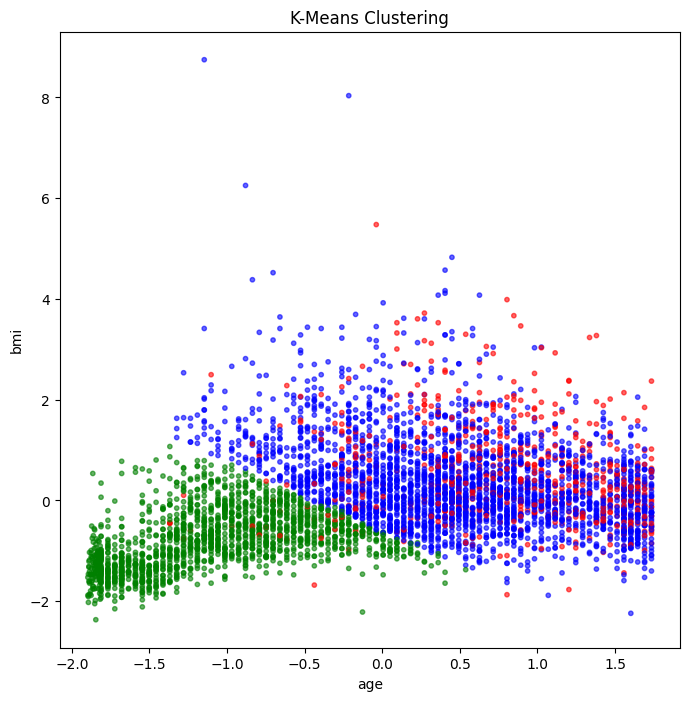

In [7]:
#클러스터 레이블별 color를 다음과 같이 지정
#cluster0: 파랑, cluster1: 빨강, cluster2: 초록

colors = ['b', 'r', 'g']
df['c'] = df['cluster'].map({0:colors[0], 1:colors[1], 2:colors[2]})

import matplotlib.pyplot as plt #matplotlib 라이브러리 호출

# 그래프 그리기
fig, ax = plt.subplots(1, figsize = (8,8))
scatter = ax.scatter(df['age'], df['bmi'], c=df['c'], alpha = 0.6, s = 10)

# 제목과 x축, y축 이름 설정
ax.set_title('K-Means Clustering')
ax.set_xlabel('age')
ax.set_ylabel('bmi')

파랑 : 나이가 아주 어리지는 않은 그룹
빨강 : 파랑과 초롯의 특성이 혼재된 그룹
초록 : 나이가 어리고 체질량이 작은 그룹

Text(0, 0.5, 'avg_glucose_level')

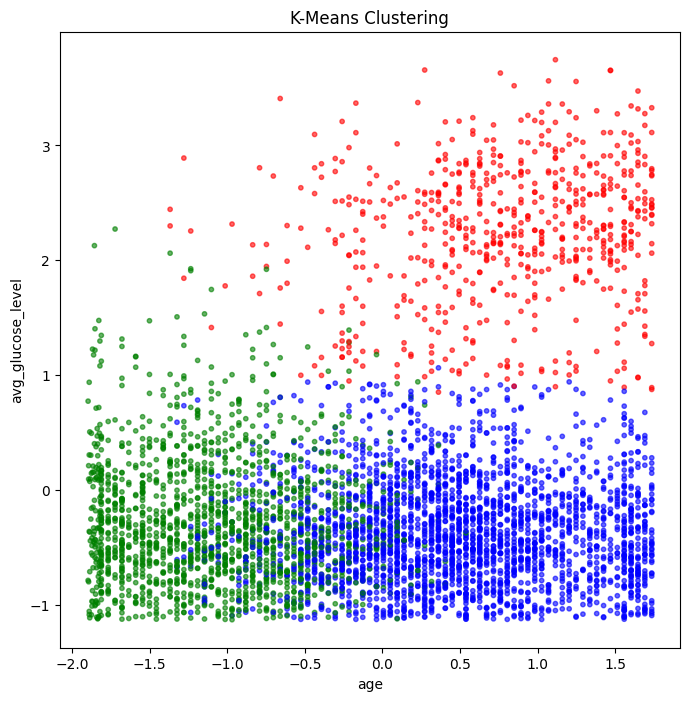

In [8]:
# 그래프 그리기
fig, ax = plt.subplots(1, figsize = (8,8))
scatter = ax.scatter(df['age'], df['avg_glucose_level'], c=df['c'], alpha = 0.6, s = 10)

# 제목과 x축, y축 이름 설정
ax.set_title('K-Means Clustering')
ax.set_xlabel('age')
ax.set_ylabel('avg_glucose_level')

Text(0, 0.5, 'bmi')

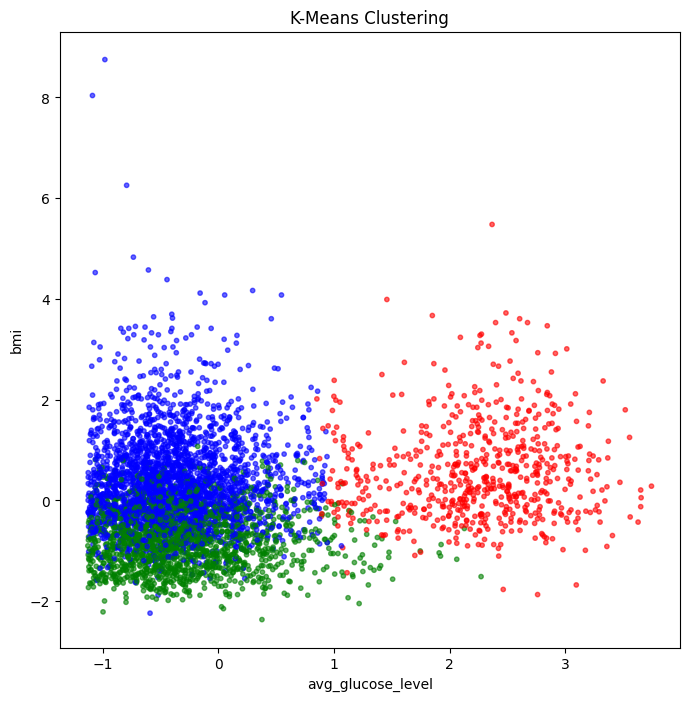

In [9]:
# 그래프 그리기
fig, ax = plt.subplots(1, figsize = (8,8))
scatter = ax.scatter(df['avg_glucose_level'], df['bmi'], c=df['c'], alpha = 0.6, s = 10)

# 제목과 x축, y축 이름 설정
ax.set_title('K-Means Clustering')
ax.set_xlabel('avg_glucose_level')
ax.set_ylabel('bmi')

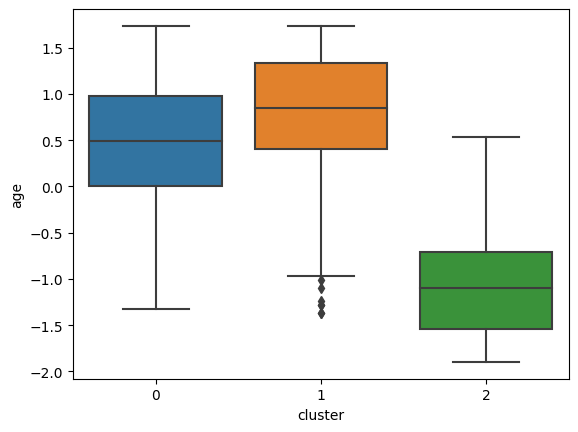

In [11]:
import seaborn as sns

sns.boxplot(x=df['cluster'], y=df['age']);

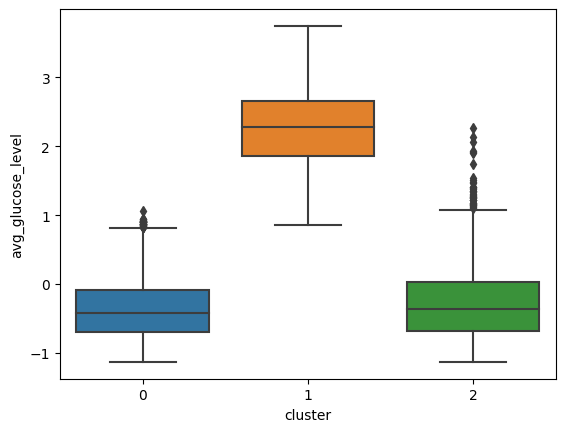

In [13]:
sns.boxplot(x=df['cluster'], y=df['avg_glucose_level']); #평균 혈당치

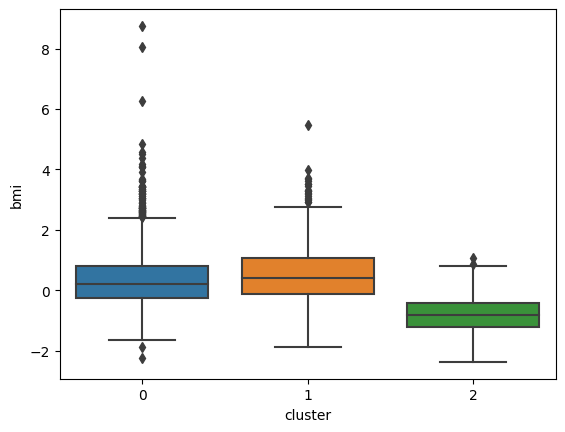

In [14]:
sns.boxplot(x=df['cluster'], y=df['bmi']); #체질량 지수